In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('StudentsPerformance.csv')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [0]:
students = df.copy()

In [0]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We need a column to list the total scores as the measurement for complete performence. As the scores are intigers they can be added directly under a column

In [0]:
students ['Total_score'] = (students['math score'] + students['reading score']+ students['writing score'])
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [0]:
students.groupby("gender").mean()



,math score,reading score,writing score,Total_score
gender,,,,
female,63.633,72.608,72.467,208.708
male,68.728,65.473,63.311,197.512


In [0]:
students.groupby("race/ethnicity").mean()

,math score,reading score,writing score,Total_score
race/ethnicity,,,,
group A,61.629,64.674,62.674,188.978
group B,63.453,67.353,65.600,196.405
group C,64.464,69.103,67.828,201.395
group D,67.363,70.031,70.145,207.538
group E,73.821,73.029,71.407,218.257


In [0]:
students.groupby("parental level of education").mean()


,math score,reading score,writing score,Total_score
parental level of education,,,,
associate's degree,67.883,70.928,69.896,208.707
bachelor's degree,69.390,73.000,73.381,215.771
high school,62.138,64.704,62.449,189.291
master's degree,69.746,75.373,75.678,220.797
some college,67.128,69.460,68.841,205.429
some high school,63.497,66.939,64.888,195.324


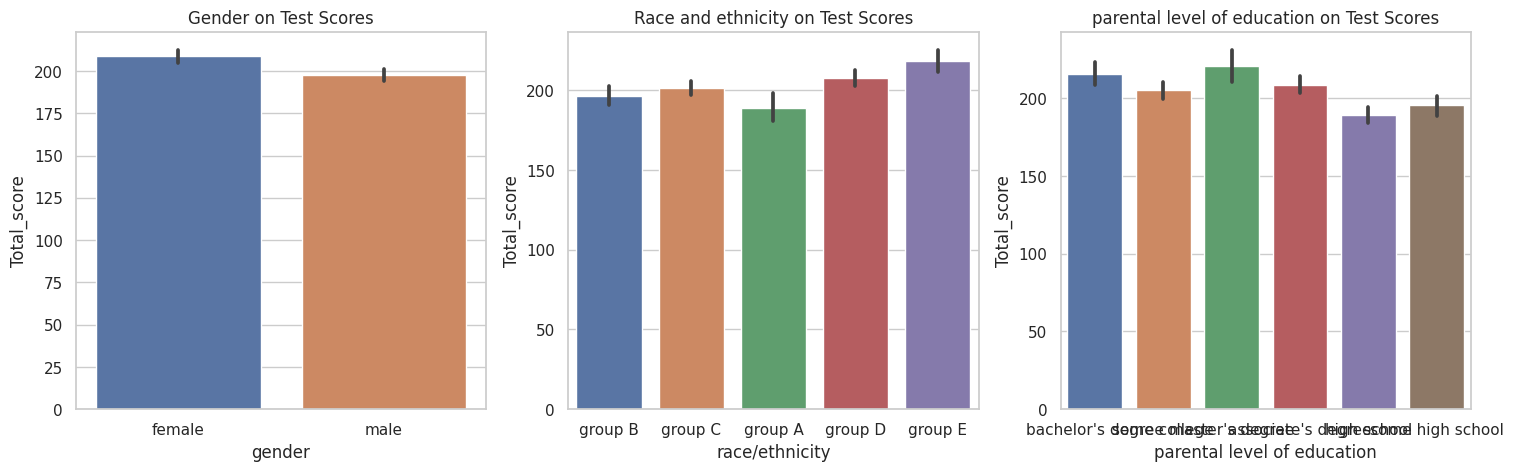

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students['gender'], students['Total_score'])
plt.title("Gender on Test Scores")

plt.subplot(1,3,2)
sns.barplot(students['race/ethnicity'], students['Total_score'])
plt.title("Race and ethnicity on Test Scores")

plt.subplot(1,3,3)
sns.barplot(students['parental level of education'], students['Total_score'])
plt.title("parental level of education on Test Scores")

plt.show()

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?



In [0]:
students.groupby("lunch").mean()

,math score,reading score,writing score,Total_score
lunch,,,,
free/reduced,58.921,64.654,63.023,186.597
standard,70.034,71.654,70.823,212.512


To see if these changes in scores is correlated we need to do test

In [0]:
ttest = stats.ttest_ind(students [students ["lunch"] == 'free/reduced']['Total_score'],
students [students ["lunch"] == 'standard']['Total_score'])
print(ttest)

Ttest_indResult(statistic=-9.575113051511472, pvalue=7.73679181249555e-21)


Since the P is smaller than .05 we reject the null hypothesis, which means that there is a significant impact 

Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?



In [0]:
students.groupby("test preparation course").mean()

,math score,reading score,writing score,Total_score
test preparation course,,,,
completed,69.696,73.894,74.419,218.008
none,64.078,66.534,64.505,195.117


In [0]:
ttest = stats.ttest_ind(students [students ["test preparation course"] == 'completed']['Total_score'],
students [students ["test preparation course"] == 'none']['Total_score'])
print(ttest)

Ttest_indResult(statistic=8.390944443482603, pvalue=1.6337802035921865e-16)


Again the P value is smaller than 0.5 which indicates a significant impact.

Birbiriyle korelasyonu en fazla olan dersler hangisidir?



In [0]:
students.corr()

,math score,reading score,writing score,Total_score
math score,1.000,0.818,0.803,0.919
reading score,0.818,1.000,0.955,0.970
writing score,0.803,0.955,1.000,0.966
Total_score,0.919,0.970,0.966,1.000


1- Writing / reading = 0.955
2- reading / math = 0.818
3- writing / math = 0.803
